# Black box assignment for I501

## By Kaicheng Yang | yangkc@iu.edu

In [1]:
import requests
import bs4

There are 10 different types of cells. Each of them is named with an airport name and assigned with a color. All the information can be found in the following table:

|id|name |Airport    |Country    |Color |
|--|-----|-----------|-----------|------|
|1 |gru  |São Paulo  |Brazil     |000000|
|2 |pty  |Tocumen    |Panama     |808080|
|3 |jfk  |New York   |U.S.       |0000FF|
|4 |lax  |L.A.       |U.S.       |FF00FF|
|5 |las  |Las Vegas  |U.S.       |00FFFF|
|6 |lis  |Lisbon     |Portugal   |008000|
|7 |bru  |Brussels   |Belgium    |FF0000|
|8 |hkg  |Hong Kong  |China      |FFA500|
|9 |icn  |Seoul      |South Korea|FFC0CB|
|10|mex  |Mexico City|Mexico     |FFFFFF|

Build a airports encode table to encode the airports name into numbers.

In [53]:
airports = ["gru", "pty", "jfk", "lax", "las", "lis", "bru", "hkg", "icn", "mex"]

In [12]:
cell_colors = ["#000000", "#808080", "#0000FF", "#FF00FF", "#00FFFF", "#008000", "#FF0000", "#FFA500", "#FFC0CB", "#70008c"]

In [57]:
airports_coding_table = {}
for i, item in enumerate(airports):
    airports_coding_table[item] = i+1

The `BlackBoxQuery` class is used to crawl data from the web page.

The `BlackBoxQuery.nextNSteps()` method can run the black box with n steps.

The current rounds can be seen by printing the `BlackBoxQuery` instance directly.

In [124]:
class BlackBoxQuery(object):
    def __init__(self):
        self.url = "http://homes.soic.indiana.edu/rocha/academics/i501/blackbox/BlackBox.php"
        self.s = requests.Session()
        self.r = self.s.get(self.url)
        self.parseHtml()
    
    def nextNSteps(self, cycles):
        self.r = self.s.get(self.url, params={"cycles": cycles})
        self.parseHtml()
    
    def getTable(self):
        table = []
        for item in self.soup.find_all("table")[0].children:
            if isinstance(item, bs4.element.Tag):
                inner_table = []
                for td in item.children:
                    if isinstance(td, bs4.element.Tag):
                         inner_table.append(airports_coding_table[td["class"][0]])
                table.append(inner_table)
        return np.asarray(table)
    
    def parseHtml(self):
        self.soup = bs4.BeautifulSoup(self.r.text)
        self.rounds = self.soup.find(id="controls").find("p").text
    
    def __repr__(self):
        return self.rounds

The new BlackBoxQueryN class deals with the nemerical version of the blackbox which can extract the number from the web page directly

In [2]:
class BlackBoxQueryN(object):
    def __init__(self):
        self.url = "http://homes.soic.indiana.edu/rocha/academics/i501/blackbox/BlackBox_N.php"
        self.s = requests.Session()
        self.r = self.s.get(self.url)
        self.parseHtml()
    
    def nextNSteps(self, cycles):
        self.r = self.s.get(self.url, params={"cycles": cycles})
        self.parseHtml()
    
    def getTable(self):
        table = []
        for item in self.soup.find_all("table")[0].children:
            if isinstance(item, bs4.element.Tag):
                inner_table = []
                for td in item.children:
                    if isinstance(td, bs4.element.Tag):
                         inner_table.append(int(td.text))
                table.append(inner_table)
        return np.asarray(table)
    
    def parseHtml(self):
        self.soup = bs4.BeautifulSoup(self.r.text, "html.parser")
        self.rounds = self.soup.find(id="controls").find("p").text
    
    def __repr__(self):
        return self.rounds

In [3]:
bn = BlackBoxQueryN()

In [25]:
table_list = []
for i in range(10):
    table_list.append(bn.getTable())
    bn.nextNSteps(1)

## Possible exploreation options:
- Check the long term behavior
- How to charactorize the system?
- Check the effect of different steps
- Divide the system into 4 different regions and see their different behaviors
- Check the correlations of the time series to see the update rule

In [4]:
from collections import Counter

In [5]:
def crawlData(steps, rounds, interval):
    table_list = []
    bbq = BlackBoxQueryN()
    for i in range(rounds):
        if interval > 0:
            if i % interval == 0:
                print i
        table_list.append(bbq.getTable())
        bbq.nextNSteps(steps)
    return table_list

In [6]:
def basicStat(table_list):
    stats = dict()
    for i in range(0, 10):
        stats[i] = list()
    for arr in table_list:
        stat = Counter(arr.flatten())
        for i in range(0, 10):
            stats[i].append(stat[i] / 400.)
    return stats

In [7]:
def getDiversity(table_list):
    diversity = []
    for arr in table_list:
        diversity.append(len(np.unique(arr.flatten())))
    return diversity

### Step = 1

In [8]:
table_list_s1_1 = crawlData(1, 100, 0)
stats_s1_1 = basicStat(table_list_s1_1)

In [9]:
table_list_s1_2 = crawlData(1, 100, 0)
stats_s1_2 = basicStat(table_list_s1_2)

In [10]:
table_list_s1_3 = crawlData(1, 100, 0)
stats_s1_3 = basicStat(table_list_s1_3)

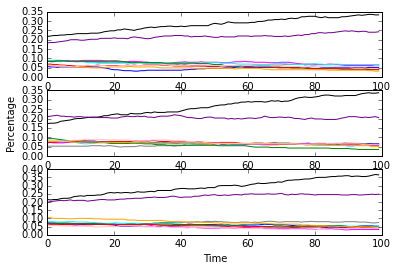

In [23]:
plt.subplot(3, 1, 1)
for i in range(0, 10):
    plt.plot(stats_s1_1[i], color=cell_colors[i])
plt.subplot(3, 1, 2)
for i in range(0, 10):
    plt.plot(stats_s1_2[i], color=cell_colors[i])

plt.ylabel("Percentage")
plt.subplot(3, 1, 3)
for i in range(0, 10):
    plt.plot(stats_s1_3[i], color=cell_colors[i])
plt.xlabel("Time")

plt.savefig("./figures/timeseriesS1.png")

### Step = 5

In [20]:
table_list_s5_1 = crawlData(5, 20, 0)
stats_s5_1 = basicStat(table_list_s5_1)

In [21]:
table_list_s5_2 = crawlData(5, 20, 0)
stats_s5_2 = basicStat(table_list_s5_2)

In [22]:
table_list_s5_3 = crawlData(5, 20, 0)
stats_s5_3 = basicStat(table_list_s5_3)

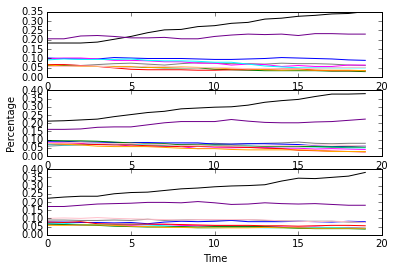

In [24]:
plt.subplot(3, 1, 1)
for i in range(0, 10):
    plt.plot(stats_s5_1[i], color=cell_colors[i])
plt.subplot(3, 1, 2)
for i in range(0, 10):
    plt.plot(stats_s5_2[i], color=cell_colors[i])
plt.ylabel("Percentage")
plt.subplot(3, 1, 3)
for i in range(0, 10):
    plt.plot(stats_s5_3[i], color=cell_colors[i])
plt.xlabel("Time")
plt.savefig("./figures/timeseriesS5.png")

### Step=10

In [25]:
table_list_s10_1 = crawlData(10, 10, 0)
stats_s10_1 = basicStat(table_list_s10_1)

table_list_s10_2 = crawlData(10, 10, 0)
stats_s10_2 = basicStat(table_list_s10_2)

table_list_s10_3 = crawlData(10, 10, 0)
stats_s10_3 = basicStat(table_list_s10_3)

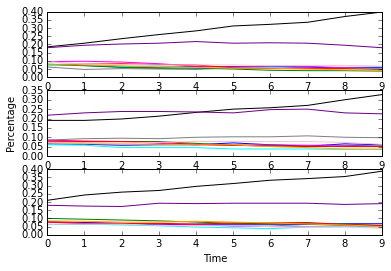

In [26]:
plt.subplot(3, 1, 1)
for i in range(0, 10):
    plt.plot(stats_s10_1[i], color=cell_colors[i])
plt.subplot(3, 1, 2)
for i in range(0, 10):
    plt.plot(stats_s10_2[i], color=cell_colors[i])
plt.ylabel("Percentage")
plt.subplot(3, 1, 3)
for i in range(0, 10):
    plt.plot(stats_s10_3[i], color=cell_colors[i])
plt.xlabel("Time")
plt.savefig("./figures/timeseriesS10.png")

### Step=20

In [27]:
table_list_s20_1 = crawlData(20, 5, 0)
stats_s20_1 = basicStat(table_list_s20_1)

table_list_s20_2 = crawlData(20, 5, 0)
stats_s20_2 = basicStat(table_list_s20_2)

table_list_s20_3 = crawlData(20, 5, 0)
stats_s20_3 = basicStat(table_list_s20_3)

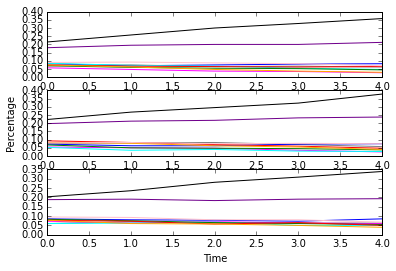

In [28]:
plt.subplot(3, 1, 1)
for i in range(0, 10):
    plt.plot(stats_s20_1[i], color=cell_colors[i])
plt.subplot(3, 1, 2)
for i in range(0, 10):
    plt.plot(stats_s20_2[i], color=cell_colors[i])
plt.ylabel("Percentage")
plt.subplot(3, 1, 3)
for i in range(0, 10):
    plt.plot(stats_s20_3[i], color=cell_colors[i])
plt.xlabel("Time")
plt.savefig("./figures/timeseriesS20.png")

# Long time behavior

Steps = 100

In [29]:
table_list_s100_1 = crawlData(100, 20, 0)
stats_s100_1 = basicStat(table_list_s100_1)
div_s100_1 = getDiversity(table_list_s100_1)

In [30]:
table_list_s100_2 = crawlData(100, 20, 0)
stats_s100_2 = basicStat(table_list_s100_2)
div_s100_2 = getDiversity(table_list_s100_2)

In [31]:
table_list_s100_3 = crawlData(100, 20, 0)
stats_s100_3 = basicStat(table_list_s100_3)
div_s100_3 = getDiversity(table_list_s100_3)

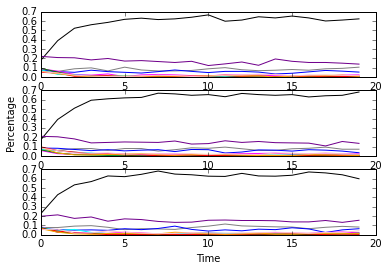

In [32]:
plt.subplot(3, 1, 1)
for i in range(0, 10):
    plt.plot(stats_s100_1[i], color=cell_colors[i])
plt.subplot(3, 1, 2)
for i in range(0, 10):
    plt.plot(stats_s100_2[i], color=cell_colors[i])
plt.ylabel("Percentage")
plt.subplot(3, 1, 3)
for i in range(0, 10):
    plt.plot(stats_s100_3[i], color=cell_colors[i])
plt.xlabel("Time")
plt.savefig("./figures/timeseriesS100.png")

See how many species are there in long time limit

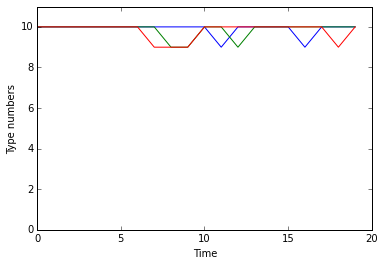

In [33]:
plot(div_s100_1)
plot(div_s100_2)
plot(div_s100_3)
plt.ylim([0,11])
plt.xlabel("Time")
plt.ylabel("Type numbers")
plt.savefig("./figures/diversity.png")

Some conclusions:
- The system will converge to stable state after about 800 steps
- The steps interval don't seem to affect the result
- In the stable state all 10 species will exsit, but the distribution is heavily skewed
- The whole space can be divided into 4 10 by 10 squares where different rules apply

In [35]:
table_list_1000 = crawlData(1, 1000, 10)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [36]:
table_list_2000 = crawlData(1, 2000, 20)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980


In [247]:
mask = np.where(table_list_s1_1[1].flatten() - table_list_s1_1[0].flatten() != 0)

In [358]:
stats_1000 = basicStat(table_list_1000)

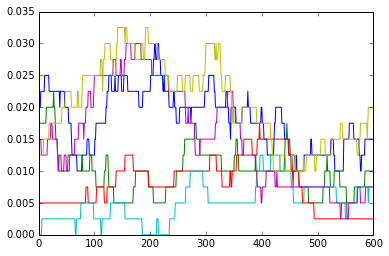

In [371]:
#plot(stats_1000[1])
#plot(stats_1000[2])
#plot(stats_1000[3])
plot(stats_1000[4][400:])
plot(stats_1000[5][400:])
plot(stats_1000[6][400:])
plot(stats_1000[7][400:])
plot(stats_1000[8][400:])
plot(stats_1000[9][400:])
#plot(stats_1000[10])

In [261]:
jumps = []
for n in range(999):
    mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
    jumps += zip(table_list_1000[n].flatten()[mask], table_list_1000[n+1].flatten()[mask])

In [262]:
print len(jumps)
jumps_counter = Counter(jumps)

1873


In [265]:
jumps_counter

Counter({(10, 1): 370, (1, 3): 195, (1, 2): 178, (3, 10): 112, (2, 1): 97, (2, 10): 68, (1, 10): 65, (3, 1): 56, (5, 1): 47, (1, 4): 47, (9, 10): 44, (4, 10): 39, (4, 1): 38, (3, 9): 23, (9, 1): 22, (8, 10): 20, (3, 2): 20, (2, 8): 19, (7, 1): 18, (8, 1): 17, (6, 1): 17, (2, 4): 16, (1, 5): 15, (2, 9): 14, (6, 10): 14, (2, 3): 14, (7, 10): 13, (8, 9): 12, (4, 2): 12, (5, 3): 12, (5, 2): 12, (2, 5): 11, (3, 8): 10, (9, 5): 9, (10, 2): 9, (9, 7): 8, (10, 4): 8, (1, 9): 8, (7, 3): 7, (7, 9): 7, (9, 3): 7, (2, 7): 7, (3, 6): 7, (3, 5): 7, (4, 3): 7, (1, 7): 7, (1, 6): 6, (7, 2): 6, (8, 2): 6, (6, 2): 5, (3, 7): 5, (4, 5): 5, (10, 5): 5, (4, 6): 5, (6, 7): 4, (4, 9): 4, (10, 3): 4, (1, 8): 4, (8, 3): 4, (9, 2): 4, (9, 8): 3, (5, 4): 3, (8, 5): 3, (6, 3): 3, (2, 6): 3, (6, 5): 3, (5, 9): 2, (8, 7): 2, (7, 8): 2, (7, 6): 2, (6, 8): 2, (6, 4): 2, (5, 10): 2, (3, 4): 2, (7, 5): 2, (4, 7): 1, (5, 7): 1, (10, 7): 1, (6, 9): 1, (4, 8): 1})

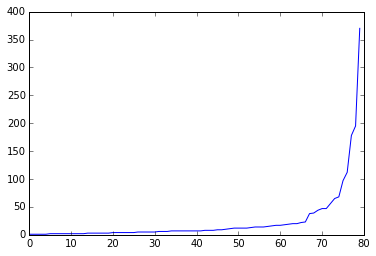

In [270]:
plot(sorted(jumps_counter.values()))

In [356]:
for key, value in jumps_counter.items():
    if key[0] == 5:
        print key, value

(5, 9) 2
(5, 4) 3
(5, 1) 47
(5, 7) 1
(5, 3) 12
(5, 10) 2
(5, 2) 12


In [357]:
for key, value in jumps_counter.items():
    if key[1] == 5:
        print key, value

(2, 5) 11
(8, 5) 3
(1, 5) 15
(4, 5) 5
(6, 5) 3
(10, 5) 5
(3, 5) 7
(7, 5) 2
(9, 5) 9


In [148]:
def getNeighbor(n, l=20):
    neighbors = []
    # left
    if n % l != 0:
        neighbors.append(n-1)
    
    # up left
    if n % l != 0 and n >= l:
        neighbors.append(n-l-1)
    
    # up
    if n >= l:
        neighbors.append(n-l)
    
    # up right
    if n >= l and (n+1) % l != 0:
        neighbors.append(n-l+1)
    
    # r
    if (n+1) % l != 0:
        neighbors.append(n+1)
    
    # right bottom
    if (n+1) % l != 0 and n < l*(l-1):
        neighbors.append(n+l+1)
    
    # d
    if n < l*(l-1):
        neighbors.append(n+l)
        
    # left bottom
    if n % l != 0 and n < l*(l-1):
        neighbors.append(n+l-1)
    return neighbors

In [402]:
def temp(n):
    mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
    for m in mask[0]:
        print "%d => %d " % (table_list_1000[n].flatten()[m], table_list_1000[n+1].flatten()[m]), (table_list_1000[n].flatten())[getNeighbor(m)]

# At most 1 change can happen in each quadrangle each step?

In [37]:
def jumpFrequencyStat(num, timeseries, region_mask):
    stat = []
    for n in range(num):
        mask = np.where(timeseries[n+1].flatten() - timeseries[n].flatten() != 0)
        counter = 0
        for m in mask[0]:
            if m in region_mask:
                #print "%d %d=>%d" % (n, timeseries[n].flatten()[m], timeseries[n+1].flatten()[m])
                counter += 1
        stat.append(counter)
    return stat

In [351]:
stat = jumpFrequencyStat(1999, table_list_2000, q4)

In [352]:
Counter(stat)

Counter({0: 1775, 1: 224})

# Divied view

In [40]:
base_arr = arange(10)
q1 = arange(10)
for i in range(9):
    q1 = np.concatenate((q1, (base_arr + 20*(i+1))))
#    print len(upleft)

In [41]:
q2 = q1 + 10

In [274]:
q3 = q1 + 200

In [43]:
q4 = q3 + 10

In [45]:
def basicStatRegional(table_list, mask):
    stats = dict()
    for i in range(0, 10):
        stats[i] = list()
    for arr in table_list:
        stat = Counter(arr.flatten()[mask])
        for i in range(0, 10):
            stats[i].append(stat[i] / 100.)
    return stats

# Compare the 4 quadrangles' time series

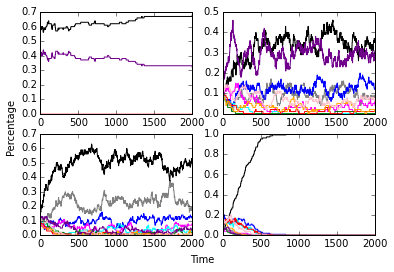

In [49]:
plt.subplot(2, 2, 1)
stats_rigional_s2000_q1 = basicStatRegional(table_list_2000, q1)
for i in range(0, 10):
    plt.plot(stats_rigional_s2000_q1[i], color=cell_colors[i])

plt.subplot(2, 2, 2)
stats_rigional_s2000_q2 = basicStatRegional(table_list_2000, q2)
for i in range(0, 10):
    plt.plot(stats_rigional_s2000_q2[i], color=cell_colors[i])
    
plt.subplot(2, 2, 3)
stats_rigional_s2000_q3 = basicStatRegional(table_list_2000, q3)
for i in range(0, 10):
    plt.plot(stats_rigional_s2000_q3[i], color=cell_colors[i])
    
plt.subplot(2, 2, 4)
stats_rigional_s2000_q4 = basicStatRegional(table_list_2000, q4)
for i in range(0, 10):
    plt.plot(stats_rigional_s2000_q4[i], color=cell_colors[i])

plt.gcf().text(0.5, 0.04, 'Time', ha='center', va='center')
plt.gcf().text(0.06, 0.5, 'Percentage', ha='center', va='center', rotation='vertical')
plt.savefig("./figures/q1234.png", dpi=200)

# Shannon entropy of 4 quadrants

In [122]:
from scipy import stats

In [136]:
def calculateEntropy(l):
    counter = Counter(l)
    prob = []
    for i in range(10):
        prob.append(counter[i]/100.)
    return stats.entropy(prob, base=2)

In [138]:
entropy = []
for i in range(2000):
    entropy.append([
            calculateEntropy(table_list_2000[i].flatten()[q1]),
            calculateEntropy(table_list_2000[i].flatten()[q2]),
            calculateEntropy(table_list_2000[i].flatten()[q3]),
            calculateEntropy(table_list_2000[i].flatten()[q4]),
        ])
entropy = np.asarray(entropy)

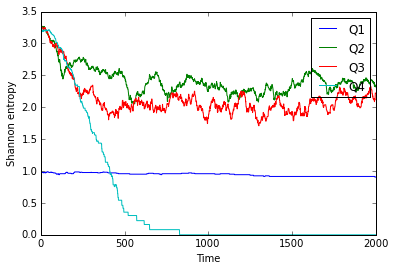

In [143]:
eq1, = plot(entropy[:,0], label="Q1")
eq2, = plot(entropy[:,1], label="Q2")
eq3, = plot(entropy[:,2], label="Q3")
eq4, = plot(entropy[:,3], label="Q4")
plt.xlabel("Time")
plt.ylabel("Shannon entropy")
plt.legend([eq1, eq2, eq3, eq4], ["Q1", "Q2", "Q3", "Q4"])
plt.savefig("./figures/entropy1234.png", dpi=200)

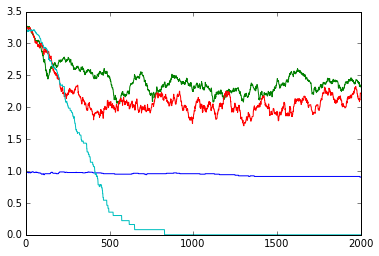

In [142]:
plot(entropy[:,0])
plot(entropy[:,1])
plot(entropy[:,2])
plot(entropy[:,3])

In [117]:
prob = []
for i in range(10):
    prob.append(c4counter[i]/100.)

In [130]:
base = 0
for item in prob:
    base += item * log(item)

In [132]:
stats.entropy(prob, base=2)

3.2324894994679858

# Sum value of each quandrant

In [92]:
sums = []
for i in range(2000):
    sums.append([
            sum(table_list_2000[i].flatten()[q1]),
            sum(table_list_2000[i].flatten()[q2]),
            sum(table_list_2000[i].flatten()[q3]),
            sum(table_list_2000[i].flatten()[q4])
        ])
sums = np.asarray(sums)

In [ ]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])

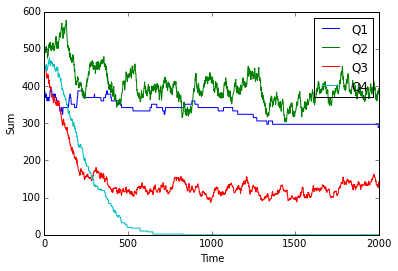

In [110]:
pq1, = plot(sums[:,0], label="Q1")
pq2, = plot(sums[:,1], label="Q2")
pq3, = plot(sums[:,2], label="Q3")
pq4, = plot(sums[:,3], label="Q4")
plt.xlabel("Time")
plt.ylabel("Sum")
plt.legend([pq1, pq2, pq3, pq4], ["Q1", "Q2", "Q3", "Q4"])
plt.savefig("./figures/sum1234.png", dpi=200)

# Q4

In [51]:
table_list_1000_10runs = []
for i in range(10):
    print i
    table_list = crawlData(10, 100, 10)
    table_list_1000_10runs.append(table_list)

0
0
10
20
30
40
50
60
70
80
90
1
0
10
20
30
40
50
60
70
80
90
2
0
10
20
30
40
50
60
70
80
90
3
0
10
20
30
40
50
60
70
80
90
4
0
10
20
30
40
50
60
70
80
90
5
0
10
20
30
40
50
60
70
80
90
6
0
10
20
30
40
50
60
70
80
90
7
0
10
20
30
40
50
60
70
80
90
8
0
10
20
30
40
50
60
70
80
90
9
0
10
20
30
40
50
60
70
80
90


In [52]:
def logistic(n0, r, t):
    return (n0 * pow(np.e, r * t))/(1 + n0 * (pow(np.e, r * t) - 1))

In [84]:
xs = np.linspace(0, 10, 1001)
ys = []
for x in xs:
    ys.append(logistic(0.12, 1, x))
ys = np.asarray(ys)

In [85]:
ts = np.linspace(0, 10, 100)

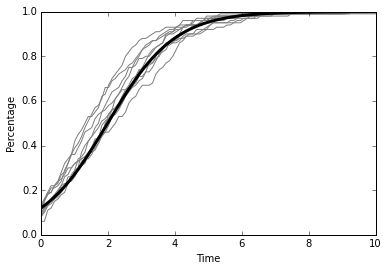

In [86]:
for i in range(10):
    q4_time_series = basicStatRegional(table_list_1000_10runs[i], q4)
    plt.plot(ts, q4_time_series[0], color="gray")
plot(xs, ys, color="black", lw=3)
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.savefig("./figures/logistic.png")

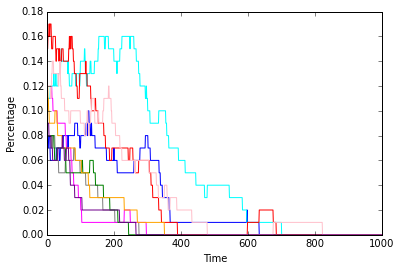

In [88]:
q4_time_series = basicStatRegional(table_list_1000, q4)
for i in range(1, 10):
    plt.plot(q4_time_series[i], color=cell_colors[i])
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.savefig("./figures/q4rest.png")

In [154]:
def jumpPattern(n, region_mask):
    mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
    for m in mask[0]:
        if m in region_mask:
            print "%d => %d " % (table_list_1000[n].flatten()[m], table_list_1000[n+1].flatten()[m]), (table_list_1000[n].flatten())[getNeighbor(m)]

In [155]:
def jumpPatternStat(num, timeseries, region_mask):
    stat = []
    for n in range(num):
        mask = np.where(timeseries[n+1].flatten() - timeseries[n].flatten() != 0)
        for m in mask[0]:
            if m in region_mask:
                stat.append((timeseries[n].flatten()[m], timeseries[n+1].flatten()[m]))
    return stat

In [167]:
jpstat = jumpPatternStat(999, table_list_1000, q4)

In [172]:
jpcounter = Counter(jpstat)

In [174]:
for i in range(10):
    print jpcounter[(0, i)]

0
0
0
0
0
0
0
0
0
0


In [191]:
n = 9
for i in range(10):
    print "%d=>%d: %d" % (n, i, jpcounter[(n, i)])

9=>0: 6
9=>1: 2
9=>2: 0
9=>3: 0
9=>4: 0
9=>5: 4
9=>6: 2
9=>7: 0
9=>8: 2
9=>9: 0


In [149]:
for i in range(10):
    jumpPattern(i, q4)

7 => 6  [5 2 8 4 5 9 3 1]
2 => 8  [6 6 8 7 2 4 3 3]
8 => 0  [6 6 8 7 2 4 3 3]
9 => 0  [8 5 4 9 4 5 2 8]
8 => 0  [1 9 6 9 9 0 5 0]
1 => 7  [0 8 8 3 7 4 2 9]
8 => 6  [6 9 1 3 7 2 0 6]
2 => 4  [2 3 4 9 5 8 5 7]


In [ ]:
for i in range(1000):
    print i
    matshow(table_list_1000[i])
    savefig("./pics/%d.png" % i)

In [228]:
import random

In [239]:
class Logistic():
    def __init__(self, N, f):
        self.N = N
        self.f = f
        self.timeseries = []
    
    def oneTimeStep(self):
        if random.random() > self.f / float(self.N):
            if random.random() < self.f / float(self.N):
                self.f += 1
                
    def nTimeStep(self, n):
        for i in range(n):
            self.timeseries.append(self.f / float(self.N))
            self.oneTimeStep()
        return self.timeseries

In [245]:
lg = Logistic(100, 10)
timeseries = lg.nTimeStep(1000)

# Q3

In [148]:
q3percentage = []
for i in range(2000):
    q3percentage.append([
            where(table_list_2000[i].flatten()[q3]==0)[0].shape[0] / 100.,
            where(table_list_2000[i].flatten()[q3]==1)[0].shape[0] / 100.
        ])
q3percentage = np.asarray(q3percentage)

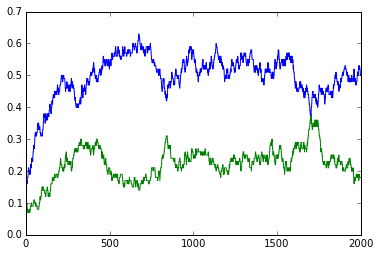

In [321]:
plot(q3percentage[:,0])
plot(q3percentage[:,1])

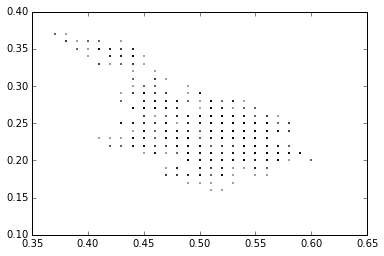

In [326]:
scatter(q3percentage[1000:,0], q3percentage[1000:,1], s=0.2)

In [329]:
stats.stats.pearsonr(q3percentage[500:, 0], q3percentage[500:, 1])

(-0.69526751268573361, 4.2290310275740567e-217)

In [231]:
print mean(q3percentage[1000:,0])
print mean(q3percentage[1000:,1])
print 1 - mean(q3percentage[1000:,0]) - mean(q3percentage[1000:,1])

0.5053
0.24213
0.25257


In [188]:
q3jpstat = jumpPatternStat(1999, table_list_2000, q3)

In [189]:
q3jpstat_counter = Counter(q3jpstat)

In [192]:
n = 0
for i in range(10):
    print "%d=>%d %d" % (n, i, q3jpstat_counter[(n, i)])

0=>0 0
0=>1 229
0=>2 103
0=>3 43
0=>4 32
0=>5 15
0=>6 10
0=>7 5
0=>8 7
0=>9 39


In [232]:
print "b=>g %d" % q3jpstat_counter[(0, 1)]
base = 0
for i in range(2, 10):
    base += q3jpstat_counter[(0, i)]
print "b=>o %d" % base

b=>g 229
b=>o 254


In [233]:
print "g=>b %d" % q3jpstat_counter[(1, 0)]
base = 0
for i in range(2, 10):
    base += q3jpstat_counter[(1, i)]
print "g=>o %d" % base

g=>b 222
g=>o 120


In [228]:
n = 1
base = 0
for i in range(2, 10):
    base += q3jpstat_counter[(n, i)]

In [229]:
base

120

In [194]:
n = 1
for i in range(10):
    print "%d=>%d %d" % (n, i, q3jpstat_counter[(n, i)])

1=>0 222
1=>1 0
1=>2 37
1=>3 31
1=>4 9
1=>5 6
1=>6 7
1=>7 7
1=>8 4
1=>9 19


In [221]:
n = 
for i in range(10):
    print "%d=>%d %d" % (n, i, q3jpstat_counter[(n, i)])

9=>0 51
9=>1 15
9=>2 11
9=>3 6
9=>4 2
9=>5 1
9=>6 0
9=>7 0
9=>8 1
9=>9 0


In [242]:
base = 0
for i in range(10):
    base += where(table_list_1000_10runs[i][0].flatten()[q3]==1)[0].shape[0] / 100.

In [243]:
base

1.1

In [245]:
import random

In [275]:
class q3Simulation():
    def __init__(self, N, p):
        self.N = N
        self.p = p
        self.black = 10
        self.gray = 10
    
    def oneTimeStep(self):
        r = random.random()
        if r < self.black / 100.:
            rr = random.random()
            if rr < self.p:
                self.black -= 1
                self.gray += 1
            elif rr < 2 * self.p:
                self.black -=1
        elif r < (self.black + self.gray) / 100.:
            rr = random.random()
            if rr < 2 * self.p:
                self.black += 1
                self.gray -= 1
            elif rr < 3 * self.p:
                self.gray -=1
        else:
            rr = random.random()
            if rr < 2 * self.p:
                self.black += 1
            elif rr < 3 * self.p:
                self.gray +=1

In [276]:
q3instance = q3Simulation(100, 0.1)

In [313]:
results = []
for i in range(10):
    q3instance = q3Simulation(100, 0.3)
    result = []
    for i in range(1000):
        result.append([q3instance.black / 100., q3instance.gray / 100.])
        q3instance.oneTimeStep()
    results.append(result)
results = np.asarray(results)

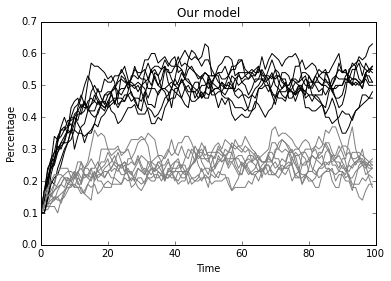

In [350]:
for i in range(10):
    plot(results[i][:,0][::10], color="black")
    plot(results[i][:,1][::10], color="gray")
plt.ylim([0, 0.7])
plt.title("Our model")
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.savefig("./figures/modelQ3.png")

In [344]:
for i in range(10):
    print stats.stats.pearsonr(results[i][:,0][500::10], results[i][:,1][500::10])

(-0.53892830750433529, 5.3956077753732526e-05)
(-0.60267741114715445, 3.6357705397588275e-06)
(-0.53955808562062191, 5.2675484009975477e-05)
(-0.42101791946511707, 0.0023295841625407517)
(-0.8331794041505427, 6.1021287269958921e-14)
(-0.6745901656740223, 7.803609823371702e-08)
(-0.63289513854954693, 8.156633905027499e-07)
(-0.80165381596445229, 2.6585673124920199e-12)
(-0.67280337772534127, 8.695686908991991e-08)
(-0.84640295205443461, 9.8430388121016936e-15)


In [292]:
q3blacks = []
q3grays = []
for i in range(10):
    q3black = []
    q3gray = []
    for j in range(100):
        #print i, j
        q3black.append(where(table_list_1000_10runs[i][j].flatten()[q3]==0)[0].shape[0] / 100.)
        q3gray.append(where(table_list_1000_10runs[i][j].flatten()[q3]==1)[0].shape[0] / 100.)
    q3blacks.append(q3black)
    q3grays.append(q3gray)
q3blacks = np.asarray(q3blacks)
q3grays = np.asarray(q3grays)

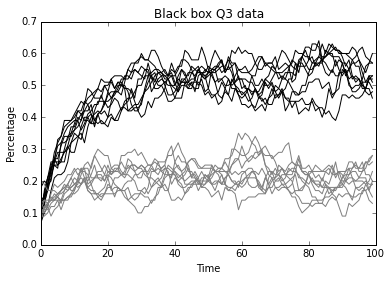

In [349]:
for i in range(10):
    plot(q3blacks[i], color = "black")
for i in range(10):
    plot(q3grays[i], color = "gray")
plt.ylim([0, 0.7])
plt.title("Black box Q3 data")
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.savefig("./figures/blackboxQ3.png")

In [338]:
for i in range(10):
    print stats.stats.pearsonr(q3blacks[i][50:], q3grays[i][50:])

(-0.78595489579246725, 1.3660105856868563e-11)
(-0.78285807458817136, 1.8565020607895567e-11)
(-0.76162036568431191, 1.3414990785578579e-10)
(-0.84383008959564243, 1.4223081538747304e-14)
(0.092037056136642495, 0.52497776893331949)
(-0.56034587794819446, 2.3187844241568225e-05)
(-0.18126192532250618, 0.20775483222649846)
(-0.7939324044641457, 6.0519340726100389e-12)
(-0.63358313369352337, 7.8689890708444663e-07)
(-0.70803788288210756, 8.882066189260275e-09)


In [290]:
len(table_list_1000_10runs[0])

100

In [ ]:
stats.stats.pearsonr()